In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\nainc\Downloads\archive\enhanced_house_price_dataset.csv")
dataset.head()

,Area,Bedrooms,Bathrooms,Stories,Parking,Age,City,Furnishing,Main Road,Guest Room,Basement,Water Supply,Air Conditioning,Preferred Tenant,Locality Rating,Price
0,1260,4,3,2,1,24,Pune,Semi-Furnished,Yes,Yes,Yes,Both,No,Company,4,1274350
1,5790,2,1,1,1,7,Kolkata,Unfurnished,Yes,Yes,Yes,Both,Yes,Bachelor,5,1094846
2,5626,5,2,3,0,15,Chennai,Semi-Furnished,No,Yes,Yes,Corporation,Yes,Company,6,1495933
3,5591,1,1,1,1,47,Delhi,Furnished,Yes,No,Yes,Borewell,No,Company,3,1003442
4,4172,5,1,1,1,44,Delhi,Unfurnished,No,No,No,Borewell,Yes,Bachelor,1,1306676


In [3]:
dataset.shape

(2000, 16)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Area              2000 non-null   int64 
 1   Bedrooms          2000 non-null   int64 
 2   Bathrooms         2000 non-null   int64 
 3   Stories           2000 non-null   int64 
 4   Parking           2000 non-null   int64 
 5   Age               2000 non-null   int64 
 6   City              2000 non-null   object
 7   Furnishing        2000 non-null   object
 8   Main Road         2000 non-null   object
 9   Guest Room        2000 non-null   object
 10  Basement          2000 non-null   object
 11  Water Supply      2000 non-null   object
 12  Air Conditioning  2000 non-null   object
 13  Preferred Tenant  2000 non-null   object
 14  Locality Rating   2000 non-null   int64 
 15  Price             2000 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 250.1+ KB


In [6]:
dataset.isnull().sum()

Area                0
Bedrooms            0
Bathrooms           0
Stories             0
Parking             0
Age                 0
City                0
Furnishing          0
Main Road           0
Guest Room          0
Basement            0
Water Supply        0
Air Conditioning    0
Preferred Tenant    0
Locality Rating     0
Price               0
dtype: int64

In [7]:
dataset.describe()

,Area,Bedrooms,Bathrooms,Stories,Parking,Age,Locality Rating,Price
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,3238.081000,3.031000,2.02150,1.996000,0.990500,24.008500,5.357500,1.245014e+06
std,1604.510239,1.427255,0.81263,0.811981,0.806682,14.319076,2.843015,3.001744e+05
min,401.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,3.346350e+05
25%,1860.000000,2.000000,1.00000,1.000000,0.000000,12.000000,3.000000,1.035278e+06
50%,3271.500000,3.000000,2.00000,2.000000,1.000000,24.000000,5.000000,1.246602e+06
75%,4599.750000,4.000000,3.00000,3.000000,2.000000,36.000000,8.000000,1.453607e+06
max,5996.000000,5.000000,3.00000,3.000000,2.000000,49.000000,10.000000,2.225409e+06


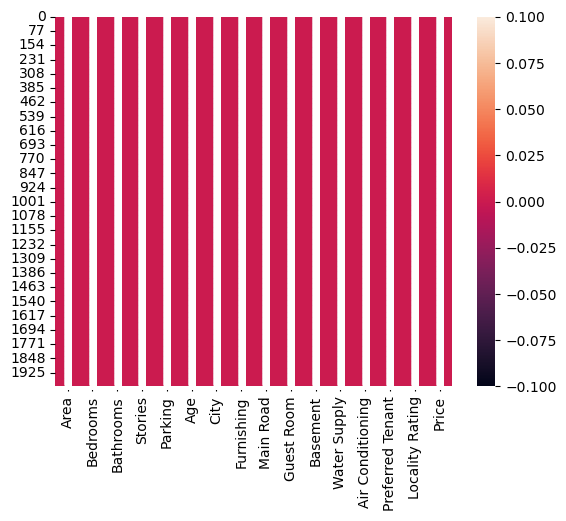

In [8]:
sns.heatmap(dataset.isnull(), annot=True)
plt.show()

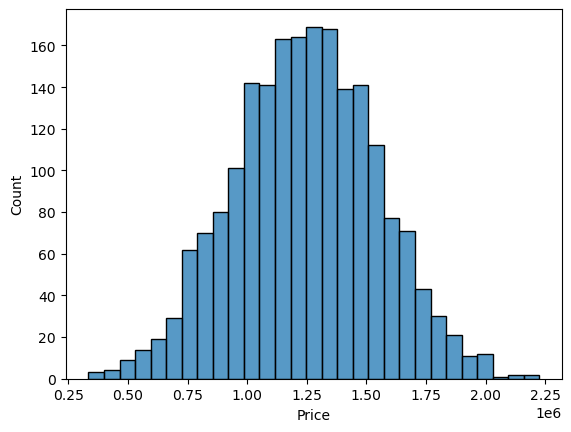

In [9]:
sns.histplot(dataset['Price'])
plt.show()

In [10]:
num_cols = dataset.select_dtypes(include=["int64","float64"]).columns
print(num_cols)

Index(['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'Age',
       'Locality Rating', 'Price'],
      dtype='object')


In [11]:
cat_cols = dataset.select_dtypes(include=["object","category"]).columns
print(cat_cols)

Index(['City', 'Furnishing', 'Main Road', 'Guest Room', 'Basement',
       'Water Supply', 'Air Conditioning', 'Preferred Tenant'],
      dtype='object')


In [12]:
# convert categorical to numerical
cat_cols = dataset.select_dtypes(include=["object","category"]).columns
dataset = pd.get_dummies(dataset, columns=cat_cols , drop_first = True )
dataset.head()

,Area,Bedrooms,Bathrooms,Stories,Parking,Age,Locality Rating,Price,City_Chennai,City_Delhi,...,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Main Road_Yes,Guest Room_Yes,Basement_Yes,Water Supply_Both,Water Supply_Corporation,Air Conditioning_Yes,Preferred Tenant_Company,Preferred Tenant_Family
0,1260,4,3,2,1,24,4,1274350,False,False,...,True,False,True,True,True,True,False,False,True,False
1,5790,2,1,1,1,7,5,1094846,False,False,...,False,True,True,True,True,True,False,True,False,False
2,5626,5,2,3,0,15,6,1495933,True,False,...,True,False,False,True,True,False,True,True,True,False
3,5591,1,1,1,1,47,3,1003442,False,True,...,False,False,True,False,True,False,False,False,True,False
4,4172,5,1,1,1,44,1,1306676,False,True,...,False,True,False,False,False,False,False,True,False,False


In [13]:
# output bool me aya hai hme num = me convert krte hai

# phle bool data extract krege
numeric_data = dataset.select_dtypes(include=['bool']).columns
# yaha ab bool ko int me krege
dataset[numeric_data]= dataset[numeric_data].astype(int)
dataset.head()

,Area,Bedrooms,Bathrooms,Stories,Parking,Age,Locality Rating,Price,City_Chennai,City_Delhi,...,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Main Road_Yes,Guest Room_Yes,Basement_Yes,Water Supply_Both,Water Supply_Corporation,Air Conditioning_Yes,Preferred Tenant_Company,Preferred Tenant_Family
0,1260,4,3,2,1,24,4,1274350,0,0,...,1,0,1,1,1,1,0,0,1,0
1,5790,2,1,1,1,7,5,1094846,0,0,...,0,1,1,1,1,1,0,1,0,0
2,5626,5,2,3,0,15,6,1495933,1,0,...,1,0,0,1,1,0,1,1,1,0
3,5591,1,1,1,1,47,3,1003442,0,1,...,0,0,1,0,1,0,0,0,1,0
4,4172,5,1,1,1,44,1,1306676,0,1,...,0,1,0,0,0,0,0,1,0,0


In [14]:
# split the data
x= dataset.drop('Price', axis=1)
y = dataset['Price']

In [15]:
# train test split 
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
# Standard Scaler for features scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [17]:
# "Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
lr.intercept_

1247023.48125

In [19]:
lr.coef_

array([ 94358.88774151, 176248.3195001 ,  73709.706367  ,  68574.29298978,
        55584.93247223, -24391.98552057,  57534.19604271,   2445.87177501,
        -1429.05792854,   3474.07723095,   -995.2898461 ,   1009.37049056,
        -4250.01114608, -38255.50757573, -77096.46165253,  27715.94796634,
        26669.61083124,  26949.1221512 ,  -9322.34750209,  -2001.45541913,
        45135.69060437,  -1627.94618998,   1405.51623735])

In [20]:
lr.score(x_test, y_test)*100


77.7883997987179

In [29]:
y_pred = lr.predict(x)

C:\Users\nainc\Downloads\Anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


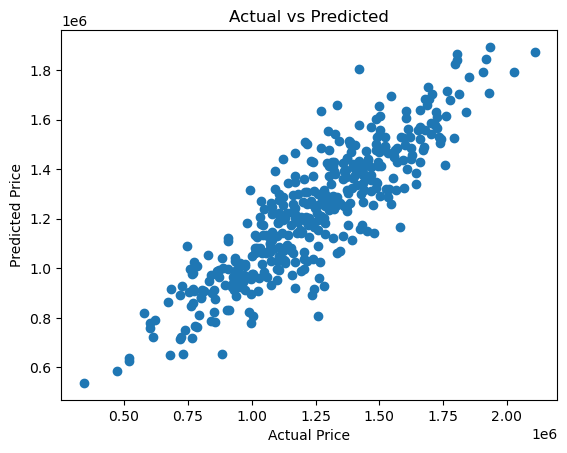

In [30]:
y_pred =lr.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [31]:
# "Ridge and Lasso Regression

In [32]:
from sklearn.linear_model import Ridge, Lasso

In [33]:
rd = Ridge()
rd.fit(x_train,y_train)

Ridge()

In [35]:
rd.score(x_test, y_test)*100

77.78997215713413

In [47]:
la = Lasso()
la.fit(x_train, y_train)

Lasso()

In [48]:
la.score(x_test, y_test)*100

77.78863579973955